# Numerical Value classification

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.1.0


In [5]:
mnist = tf.keras.datasets.mnist

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 10s 164us/sample - loss: 0.3117 - accuracy: 0.9130
Epoch 2/3
60000/60000 [==============================] - 7s 115us/sample - loss: 0.1429 - accuracy: 0.9575
Epoch 3/3
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0982 - accuracy: 0.9710


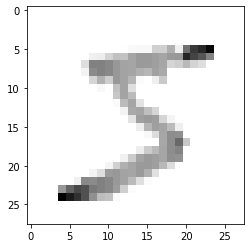

In [6]:
(X_train,y_train),(X_test,y_test)= mnist.load_data()

X_train = tf.keras.utils.normalize(X_train,axis=1)
X_test = tf.keras.utils.normalize(X_test,axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(X_train,y_train,epochs=3)


plt.imshow(X_train[0],cmap=plt.cm.binary)
plt.show()

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
val_loss, val_acc = model.evaluate(X_test,y_test)

In [6]:
print(val_loss,val_acc)

0.10600883359089494 0.9684


In [7]:
model.save('num_reader_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: num_reader_model\assets


In [8]:
new_model = tf.keras.models.load_model('num_reader_model')

In [9]:
predictions = new_model.predict([X_test])

In [10]:
print(predictions)

[[1.00588909e-06 1.14054677e-08 7.36660731e-05 ... 9.98974562e-01
  8.26909741e-07 7.23088260e-06]
 [1.44829683e-05 2.46429164e-03 9.92271781e-01 ... 1.07414723e-10
  3.17912782e-05 8.64558480e-10]
 [1.13387277e-05 9.96045053e-01 5.32800623e-04 ... 5.51198609e-04
  1.70268223e-03 1.16075735e-05]
 ...
 [9.81076997e-09 3.22400808e-08 1.20048207e-05 ... 6.24755849e-05
  1.96122797e-03 3.32797412e-03]
 [2.35679836e-05 2.38644049e-07 9.02999204e-07 ... 2.85816810e-07
  1.92413554e-02 8.38936174e-08]
 [7.67022175e-06 2.02266004e-09 6.13276097e-06 ... 3.39377193e-09
  2.35060682e-07 1.81492754e-09]]


In [15]:
import numpy as np
print(np.argmax(predictions[3]))

0


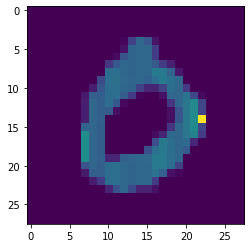

In [16]:
plt.imshow(X_test[3])
plt.show()